# Modules à importer

In [1]:
import scipy
import pickle
import numpy as np
import pandas as pd
# import iminuit as im
from scipy.stats import poisson
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from IPython.display import display, Latex
from sklearn.linear_model import LinearRegression
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "EB Garamond",
    "axes.labelsize": 'x-large',
    "xtick.labelsize": 'x-large',
    "ytick.labelsize": 'x-large'})
plt.rcParams['figure.facecolor'] = 'w'
plt.rc('text.latex', preamble=r'\usepackage[detect-all,locale=FR]{siunitx}[=v2]')
import random

### Exo 1

In [11]:
k = {296.15:0.100, 308.15:0.188, 313.15:0.257, 318.15:0.356}
df = pd.DataFrame(k, index=[0])

In [12]:
df

,296.15,308.15,313.15,318.15
0,0.1,0.188,0.257,0.356


In [13]:
T = np.asarray(list(k.keys())).reshape((-1,1))
lnT = np.log(T)
usT = 1/T
K = np.asarray(list(k.values()))
lnK = np.log(K)
model = LinearRegression().fit(usT,lnK)
r_sq = model.score(usT,lnK)
a = model.coef_[0]
b = model.intercept_

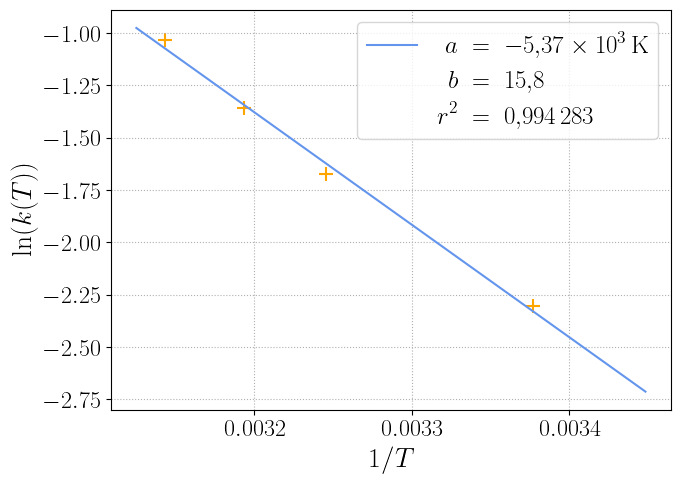

In [17]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_axes([0.1, 0.12, 0.8, 0.8])

Tlin = np.linspace(290, 320, 500)
usTlin = 1/Tlin
ax.plot(usTlin, a*usTlin + b, lw=1.5, color='cornflowerblue',
       label=fr'\begin{{eqnarray*}}a &=& \SI{{{a:.2e}}}{{K}}\\b &=& \num{{{b:.1f}}}\\r^2 &=& \num{{{r_sq:.6f}}}\end{{eqnarray*}}')
ax.scatter(usT,lnK, marker='+', color='orange', s=100)

# ax.plot([0.0013, 0.0013],
#         [ax.get_ylim()[0], a*0.0013+b],
#         'firebrick', ls='--', lw=1)
# ax.plot([0.0013, 0.001],
#         [a*0.0013+b, a*0.0013+b],
#         'firebrick', ls='--', lw=1)

#ax.set_xlim(left=0.001)
#ax.set_ylim(bottom=-12)

ax.grid(linestyle=':')
ax.tick_params(labelsize='xx-large')

ax.set_xlabel('$1/T$', fontsize=20)
ax.set_ylabel('$\ln(k(T))$', fontsize=20)

ax.legend(loc='upper right', fontsize=18)

fig.savefig('reglin_k.pdf', bbox_inches='tight')